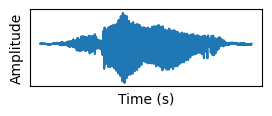

In [75]:
import wave
import numpy as np

import matplotlib.pyplot as plt

# Load the wave file
file_path = '/home/hastabbe/sound_mnist_16khz/0_01_22.wav'
with wave.open(file_path, 'r') as wav_file:
    # Extract raw audio frames
    frames = wav_file.readframes(-1)
    # Convert frames to numpy array
    sound = np.frombuffer(frames, dtype=np.int16)
    # Get the frame rate
    frame_rate = wav_file.getframerate()

# Plot the wave file
time = np.linspace(0, len(sound) / frame_rate, num=len(sound))
plt.figure(figsize=(3, 1))
plt.plot(time, sound)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xticks([])  # Remove x-axis numbers
plt.yticks([])  # Remove y-axis numbers
plt.show()

([], [])

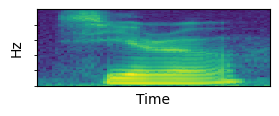

In [87]:

import librosa
import numpy as np

y, sr = librosa.load(file_path, sr=16000)
mel_spec = librosa.feature.melspectrogram(
    y=y, sr=sr, n_fft=400, hop_length=160, win_length=400, n_mels=80, power=2.0
)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the Mel spectrogram with matplotlib
plt.figure(figsize=(3,1))
librosa.display.specshow(
    log_mel_spec, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='viridis'
)   
plt.xticks([])  # Remove x-axis numbers
plt.yticks([])  # Remove y-axis numbers

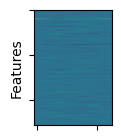

In [85]:
# Plot encoded data
file_encoded = '/home/hastabbe/encoded/0_01_22_enc.csv'
encoded_data = np.loadtxt(file_encoded, delimiter=',')
plt.figure(figsize=(1, 1.5))
plt.imshow(encoded_data.T, aspect='auto', cmap='viridis')
plt.ylabel('Features')
  # Remove x-axis numbers
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)

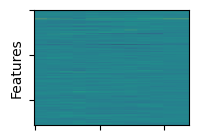

In [91]:
# Plot encoded data
file_encoded_long = '/home/hastabbe/encoded_long/0_01_22_enc_long.csv'
encoded_data_long = np.loadtxt(file_encoded_long, delimiter=',',skiprows=1)
plt.figure(figsize=(2, 1.5))
plt.imshow(encoded_data_long, aspect='auto', cmap='viridis')
plt.ylabel('Features')
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)

In [66]:
from sklearn.decomposition import PCA
import pandas as pd

raw_data = {}
all_samples = []
steps = {
    "cue": 160,
    "stimulus": 160,
    "response": 160,
    "total": 480
}

for number in range(3):
    raw_data[number] = {}
    for sample in range(50):
        df = pd.read_csv(f"/home/hastabbe/encoded_long/{number}_01_{sample}_enc_long.csv")
        df = df.iloc[:, 1:].T  # Transpose so that time steps are rows
        # Pad or truncate BEFORE PCA
        if df.shape[0] < steps["cue"]:
            df = pd.concat([df, pd.DataFrame(np.zeros((steps["cue"] - df.shape[0], df.shape[1])), columns=df.columns)], axis=0)
        else:
            df = df.iloc[:steps["cue"], :]
        raw_data[number][sample] = df
        all_samples.append(df.values)


all_data_matrix = np.vstack(all_samples)
pca = PCA(n_components=20)
pca.fit(all_data_matrix)
scaler_max = 500

Text(0, 0.5, 'Components')

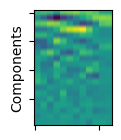

In [89]:
# transform encoded data long
data_long_pca = pca.transform(encoded_data_long.T).T

# Plot the PCA transformed data
plt.figure(figsize=(1, 1.5))
plt.imshow(data_long_pca, aspect='auto', cmap='viridis')
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.ylabel('Components')